In [39]:
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
import pandas as pd

In [90]:
data = pd.read_csv('AmazonWebScraperDataset.csv') #5000 rows
#data = pd.read_csv('AmazonWebScraperDataset2.csv') #1037 rows
data

Review                Star
0     I’m honestly blown away by how good these thin...  5.0 out of 5 stars
1     These headphones are great! I've had them for ...  5.0 out of 5 stars
2     First off, the battery life is insane. I’ve be...  4.0 out of 5 stars
3     here’s my review after using this product for ...  5.0 out of 5 stars
4     I actually bought this one after reading a lot...  5.0 out of 5 stars
...                                                 ...                 ...
5344  I have had the OG noodles and the hot and spic...  5.0 out of 5 stars
5345  I really love these. (Even though they are def...  5.0 out of 5 stars
5346  Many of the flavors are very spicy to me!They ...  5.0 out of 5 stars
5347  I am delighted with my case of noodles. I rece...  5.0 out of 5 stars
5348  Very tasty can add veggies or chicken and or beef  5.0 out of 5 stars

[5349 rows x 2 columns]

In [91]:
import re
import string
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

# Remove NaN row
data = data.dropna()

'''
Solve phrases like I'm to I am, hasn't to has not, here's to here is.
'''
#%pip install contractions
import contractions
def expand_contractions(text):
    return contractions.fix(text)

# remove words with numbers, punctuation and capital letters
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['Review'] = data.Review.apply(expand_contractions)
data['Review'] = data.Review.map(alphanumeric).map(punc_lower)
#data.head()
print(data['Review'])

C:\Users\ACSNIGHT YAP\AppData\Local\Temp\ipykernel_6608\1487572788.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data.Review.apply(expand_contractions)


0       i am honestly blown away by how good these thi...
1       these headphones are great  i have had them fo...
2       first off  the battery life is insane  i have ...
3       here is my review after using this product for...
4       i actually bought this one after reading a lot...
                              ...                        
5344    i have had the og noodles and the hot and spic...
5345    i really love these   even though they are def...
5346    many of the flavors are very spicy to me they ...
5347    i am delighted with my case of noodles  i rece...
5348    very tasty can add veggies or chicken and or beef
Name: Review, Length: 5281, dtype: object


C:\Users\ACSNIGHT YAP\AppData\Local\Temp\ipykernel_6608\1487572788.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data.Review.map(alphanumeric).map(punc_lower)


# Lemming

In [92]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to apply lemmatization
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# New Section

In [93]:
# Apply lemmatization
#nltk.download('wordnet')
#nltk.download('punkt_tab')
data['Review'] = data['Review'].apply(lemmatize_text)  # For lemmatization

# Display the processed data
print(data['Review'].head())

0    i am honestly blown away by how good these thi...
1    these headphone are great i have had them for ...
2    first off the battery life is insane i have be...
3    here is my review after using this product for...
4    i actually bought this one after reading a lot...
Name: Review, dtype: object


C:\Users\ACSNIGHT YAP\AppData\Local\Temp\ipykernel_6608\2068508654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(lemmatize_text)  # For lemmatization


In [94]:
# Re-encode train and test Score column value
def categorize_rating(rating):
    # Extract numeric value from the rating string
    numeric_rating = float(rating.split()[0])

    # Map numeric rating to category
    if numeric_rating >= 4.0:
        return 'Positive'
    elif numeric_rating == 3.0:
        return 'Neutral'
    else:
        return 'Negative'

In [95]:
data.rename(columns={
    'Review': 'Text',
    'Star': 'Score'
}, inplace=True)
data.head()

C:\Users\ACSNIGHT YAP\AppData\Local\Temp\ipykernel_6608\3010465300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


Text               Score
0  i am honestly blown away by how good these thi...  5.0 out of 5 stars
1  these headphone are great i have had them for ...  5.0 out of 5 stars
2  first off the battery life is insane i have be...  4.0 out of 5 stars
3  here is my review after using this product for...  5.0 out of 5 stars
4  i actually bought this one after reading a lot...  5.0 out of 5 stars

In [96]:
data['Score'] = data.Score.apply(categorize_rating)
data['Score']

C:\Users\ACSNIGHT YAP\AppData\Local\Temp\ipykernel_6608\1467311619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Score'] = data.Score.apply(categorize_rating)


0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
5344    Positive
5345    Positive
5346    Positive
5347    Positive
5348    Positive
Name: Score, Length: 5281, dtype: object

In [116]:
clean_data = data[data['Text'] != 'inner review not found']
#finddata = data[data['Score'] == 'Neutral']
clean_data

Text     Score
0     i am honestly blown away by how good these thi...  Positive
1     these headphone are great i have had them for ...  Positive
2     first off the battery life is insane i have be...  Positive
3     here is my review after using this product for...  Positive
4     i actually bought this one after reading a lot...  Positive
...                                                 ...       ...
5344  i have had the og noodle and the hot and spice...  Positive
5345  i really love these even though they are defin...  Positive
5346  many of the flavor are very spicy to me they c...  Positive
5347  i am delighted with my case of noodle i receiv...  Positive
5348   very tasty can add veggie or chicken and or beef  Positive

[5273 rows x 2 columns]

In [117]:
def oversample_class(data, label, target_count):
    class_df = data[data['Score'] == label]
    num_to_add = target_count - len(class_df)

    if num_to_add > 0:
        # Sample with replacement
        additional_df = class_df.sample(n=num_to_add, replace=True)
        return pd.concat([data, additional_df])
    else:
        return data

In [118]:
class_counts = clean_data['Score'].value_counts()
class_counts_dict = class_counts.to_dict()
max_count = class_counts.max()

In [119]:
oversampled_df = clean_data.copy()
for label, count in class_counts_dict.items():
    oversampled_df = oversample_class(oversampled_df, label, max_count)

oversampled_df.reset_index(drop=True, inplace=True)
oversampled_df

Text     Score
0     i am honestly blown away by how good these thi...  Positive
1     these headphone are great i have had them for ...  Positive
2     first off the battery life is insane i have be...  Positive
3     here is my review after using this product for...  Positive
4     i actually bought this one after reading a lot...  Positive
...                                                 ...       ...
8893  this would get a star if it wa not so high on ...   Neutral
8894  soft cotton material doe shrink quite a bit bu...   Neutral
8895  firstly the sound quality itself is amazing an...   Neutral
8896  i love the concept of a portable drive and exp...   Neutral
8897  the cpu itself is phenomenal however upon rece...   Neutral

[8898 rows x 2 columns]

In [120]:
rows_df1 = clean_data.shape[0]
rows_df2 = oversampled_df.shape[0]

print(f"Number of rows in not oversampled dataset: {rows_df1}")
print(f"Number of rows in oversampled dataset: {rows_df2}")

Number of rows in not oversampled dataset: 5273
Number of rows in oversampled dataset: 8898


In [121]:
#X = clean_data.Text
#y = clean_data.Score
X = oversampled_df.Text
y = oversampled_df.Score

In [122]:
#%pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [146]:
import pickle

filename = 'vectorizer.pkl'
pickle.dump(cv, open(filename, 'wb'))

In [124]:
# Use a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Train the model
lr.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_cv_lr = lr.predict(X_test_cv)
y_pred_cv_lr # The output is all of the predictions/ labels

array(['Negative', 'Negative', 'Neutral', ..., 'Positive', 'Neutral',
       'Negative'], dtype=object)

In [125]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_pred_cv_lr)
# Sum of the diagonal elements (true positives for each class)
correct_predictions = cm.diagonal().sum()
# Sum of all elements in the confusion matrix
total_predictions = cm.sum()
# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8596


In [126]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_cv_lr)
print(report)

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85       894
     Neutral       0.82      0.96      0.89       874
    Positive       0.90      0.78      0.84       902

    accuracy                           0.86      2670
   macro avg       0.86      0.86      0.86      2670
weighted avg       0.86      0.86      0.86      2670



In [147]:
# prompt: saved the trained model for LogisticRegression as pkl format

import pickle

# Save the model to a file
filename = 'logistic_regression_model.pkl'
pickle.dump(lr, open(filename, 'wb'))


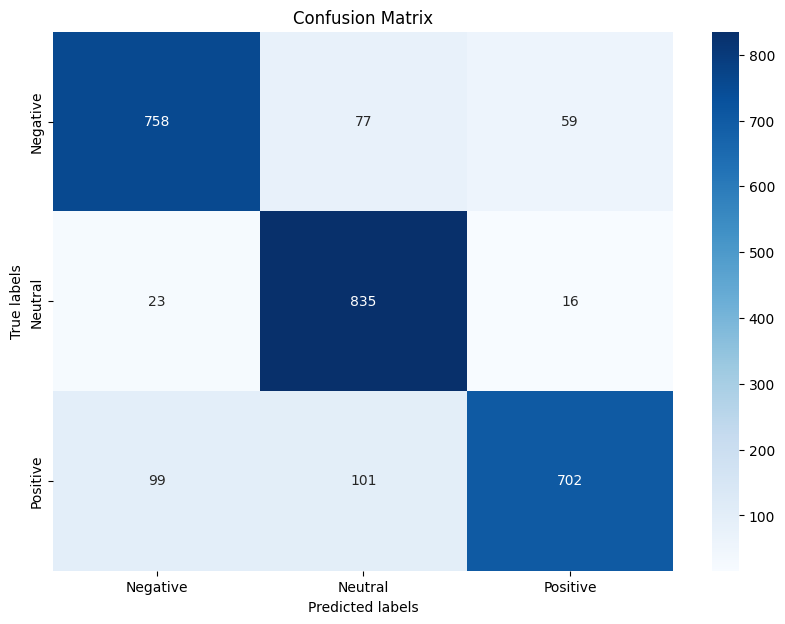

In [127]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

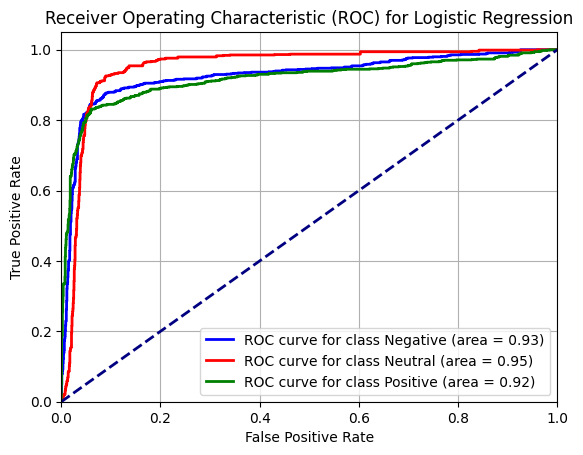

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

y_prob = lr.predict_proba(X_test_cv)

y_test_bin = label_binarize(y_test, classes=lr.classes_)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, class_label in enumerate(lr.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(lr.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {lr.classes_[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### - SVM

In [128]:
# Use a SVM model
from sklearn import svm
svm = svm.SVC()

# Train the model
svm.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred_cv_svm = svm.predict(X_test_cv)
y_pred_cv_svm # The output is all of the predictions/ labels

array(['Negative', 'Negative', 'Neutral', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [129]:
from sklearn.metrics import confusion_matrix
# %pip install matplotlib
import matplotlib.pyplot as plt
# %pip install seaborn
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_pred_cv_svm)
# Sum of the diagonal elements (true positives for each class)
correct_predictions = cm.diagonal().sum()
# Sum of all elements in the confusion matrix
total_predictions = cm.sum()
# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7816


In [130]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_cv_svm)
print(report)

              precision    recall  f1-score   support

    Negative       0.86      0.68      0.76       894
     Neutral       0.69      0.92      0.79       874
    Positive       0.84      0.75      0.80       902

    accuracy                           0.78      2670
   macro avg       0.80      0.78      0.78      2670
weighted avg       0.80      0.78      0.78      2670



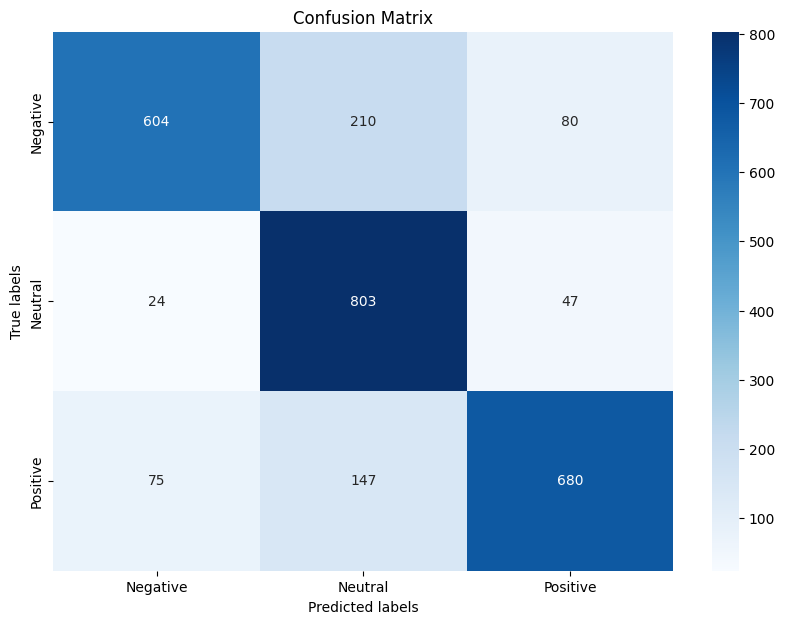

In [131]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [148]:
# prompt: saved trained model for SVM as pkl format

# Save the model to a file
filename = 'svm_model.pkl'
pickle.dump(svm, open(filename, 'wb'))


# Naive Bayes

In [132]:
from sklearn.naive_bayes import MultinomialNB

# Use a Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(X_train_cv, y_train)

# Make predictions on the test set
y_pred_cv_nb = nb.predict(X_test_cv)
y_pred_cv_nb

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_cv_nb)
correct_predictions = cm.diagonal().sum()
total_predictions = cm.sum()

#calculate accurancy
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7491


In [133]:
report = classification_report(y_test, y_pred_cv_nb)
print(report)

              precision    recall  f1-score   support

    Negative       0.75      0.76      0.76       894
     Neutral       0.68      0.81      0.74       874
    Positive       0.84      0.69      0.75       902

    accuracy                           0.75      2670
   macro avg       0.76      0.75      0.75      2670
weighted avg       0.76      0.75      0.75      2670



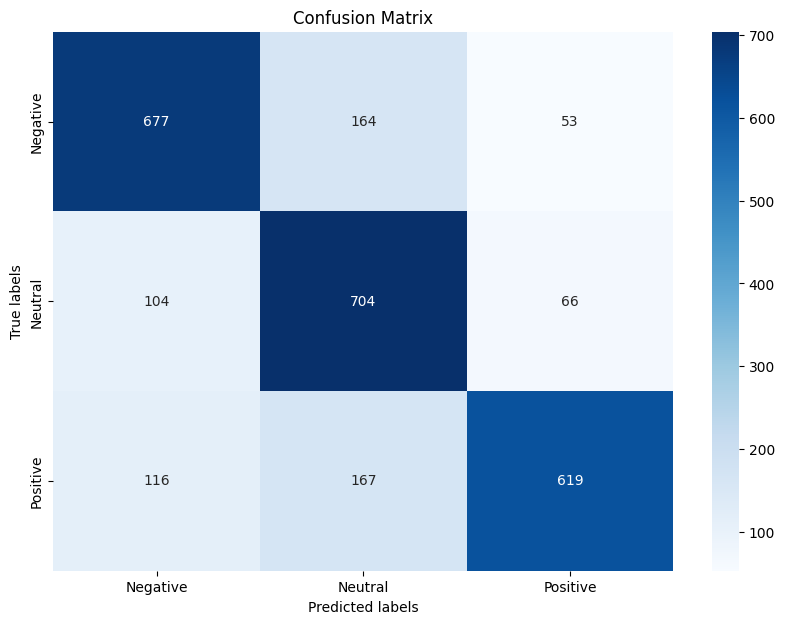

In [134]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [149]:
# prompt: save trained model for nb as pkl

# Save the model to a file
filename = 'naive_bayes_model.pkl'
pickle.dump(nb, open(filename, 'wb'))


# Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_cv, y_train)
y_pred_cv_rf = rf.predict(X_test_cv)
y_pred_cv_rf # The output is all of the predictions/ labels

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_cv_rf)
correct_predictions = cm.diagonal().sum()
total_predictions = cm.sum()

#calculate accurancy
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9105


In [137]:
report = classification_report(y_test, y_pred_cv_rf)
print(report)

              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88       894
     Neutral       0.96      0.97      0.97       874
    Positive       0.88      0.88      0.88       902

    accuracy                           0.91      2670
   macro avg       0.91      0.91      0.91      2670
weighted avg       0.91      0.91      0.91      2670



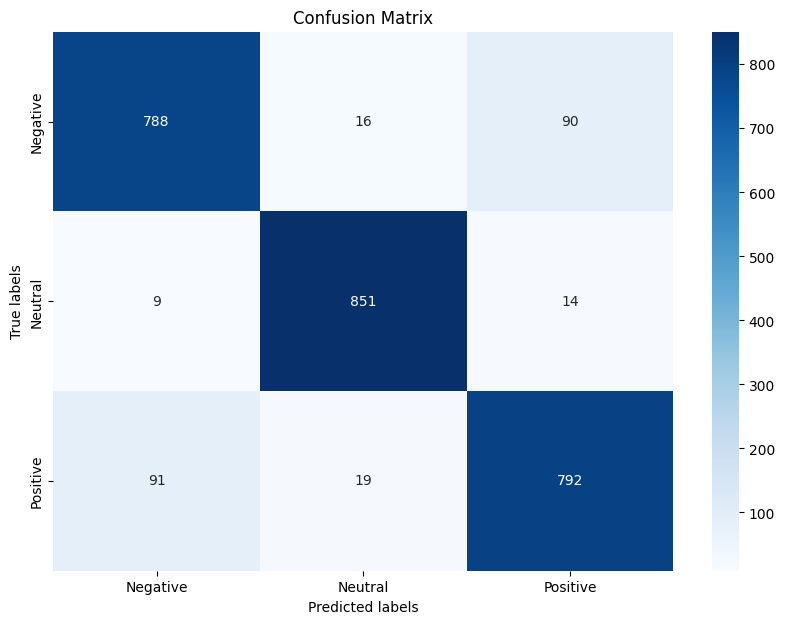

In [138]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [150]:
# prompt: save trained model for rf as pkl

import pickle

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))


# Testing

In [255]:
# Preprocess the input
sentence = "This product is good."
sentence = expand_contractions(sentence)

sentence = re.sub(r"""\w*\d\w*""", ' ', sentence)
sentence = re.sub('[%s]' % re.escape(string.punctuation), ' ', sentence.lower())

sentence = lemmatize_text(sentence)

sentence_cv = cv.transform([sentence])

#print(sentence_cv)

result = lr.predict(sentence_cv)
print(result)
result = svm.predict(sentence_cv)
print(result)
result = nb.predict(sentence_cv)
print(result)
result = rf.predict(sentence_cv)
print(result)

['Positive']
['Positive']
['Positive']
['Positive']


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [141]:
def plot_learning_curve(model, X_train_cv, y_train, title):
    # Compute learning curves
    train_sizes, train_scores, valid_scores = learning_curve(
        model,
        X_train_cv,
        y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )
    
    # Compute the mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    
    # Plot learning curves
    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation score')
    
    # Plot the standard deviation as shaded areas
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color='g')
    
    plt.title(title)
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


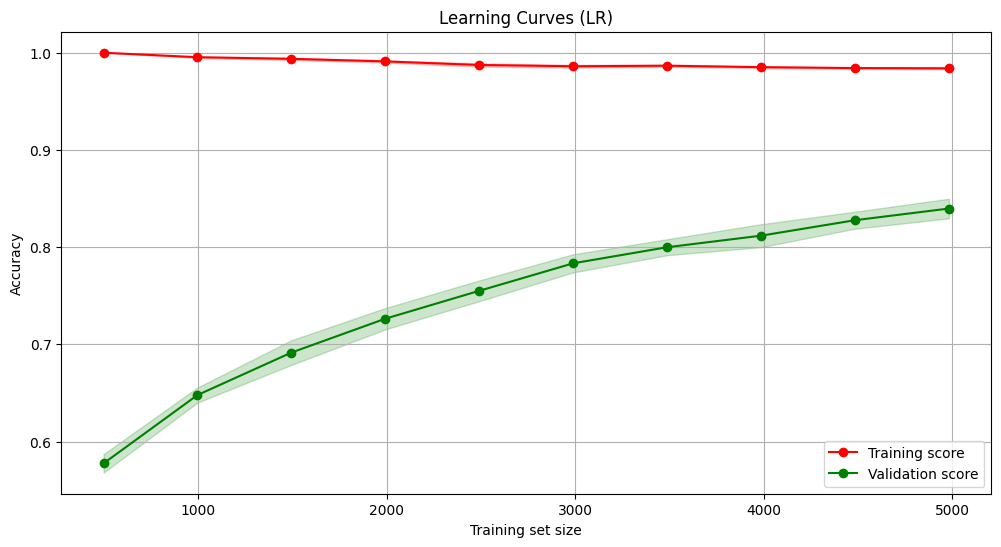

In [142]:
plot_learning_curve(lr, X_train_cv, y_train, title='Learning Curves (LR)')

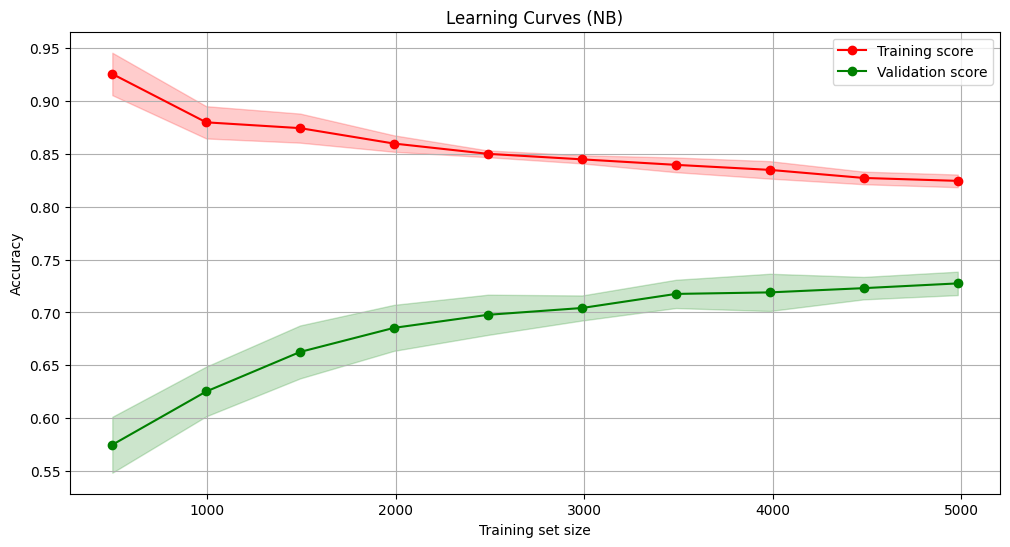

In [143]:
plot_learning_curve(nb, X_train_cv, y_train, title='Learning Curves (NB)')

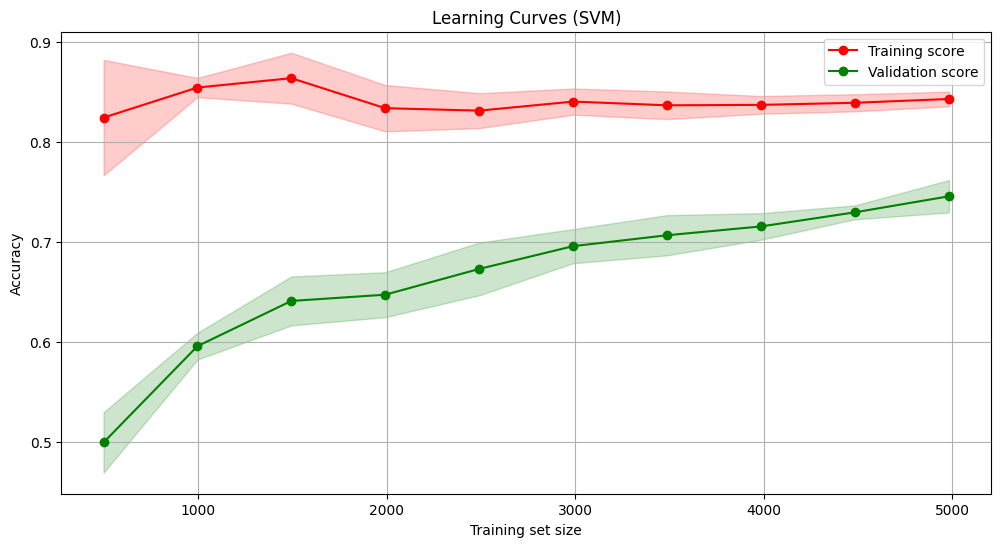

In [144]:
plot_learning_curve(svm, X_train_cv, y_train, title=f'Learning Curves (SVM)')

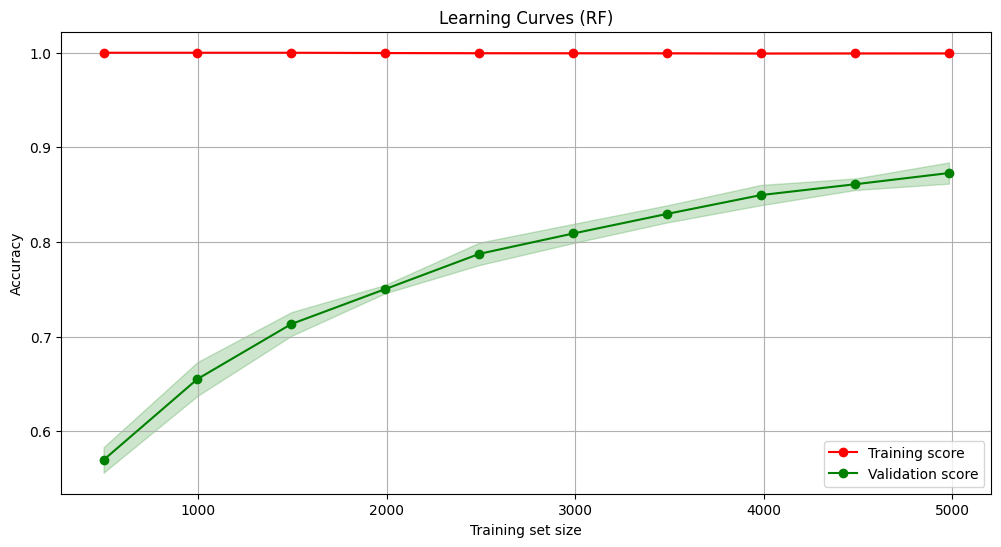

In [145]:
plot_learning_curve(rf, X_train_cv, y_train, title=f'Learning Curves (RF)')